In [120]:
import requests
from dotenv import load_dotenv
import yfinance as yf
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
from MCForecastTools import MCSimulation

In [92]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas
import seaborn as sns

In [7]:
load_dotenv()

True

In [8]:
def tickerGrab(ticker, period="5y"):
    symbol = yf.Ticker(ticker)
    symbol_hist = symbol.history(period=period)
    symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1)
    symbol_hist.to_csv(f"{ticker}_hist.csv")
    return symbol_hist

In [39]:
# sp500 stock data last 5-years
sp500 = tickerGrab(ticker="^GSPC")
sp500

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-31,2100.129883,2103.479980,2088.659912,2096.949951,4514410000
2016-06-01,2093.939941,2100.969971,2085.100098,2099.330078,3525170000
2016-06-02,2097.709961,2105.260010,2088.590088,2105.260010,3632720000
2016-06-03,2104.070068,2104.070068,2085.360107,2099.129883,3627780000
2016-06-06,2100.830078,2113.360107,2100.830078,2109.409912,3442020000
...,...,...,...,...,...
2021-05-24,4170.160156,4209.520020,4170.160156,4197.049805,2947400000
2021-05-25,4205.939941,4213.419922,4182.520020,4188.129883,3420870000
2021-05-26,4191.589844,4202.609863,4184.109863,4195.990234,3674490000


In [40]:
# nasdaq stock data last 5-years
nasdaq = tickerGrab(ticker="^IXIC")
nasdaq

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-31,4938.479980,4951.450195,4923.029785,4948.049805,2285350000
2016-06-01,4928.970215,4958.979980,4923.200195,4952.250000,1797090000
2016-06-02,4941.250000,4971.359863,4924.229980,4971.359863,1729050000
2016-06-03,4958.100098,4958.649902,4909.209961,4942.520020,1697840000
2016-06-06,4950.459961,4980.140137,4944.870117,4968.709961,1663840000
...,...,...,...,...,...
2021-05-24,13557.209961,13708.849609,13551.009766,13661.169922,3490650000
2021-05-25,13721.540039,13751.139648,13631.799805,13657.169922,4084480000
2021-05-26,13693.940430,13750.160156,13679.589844,13738.000000,4231140000


In [41]:
# total world market stock data last 5-years
msci_world = tickerGrab(ticker="MSCI")
msci_world

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-31,75.301909,75.595352,74.506763,75.529091,1220900
2016-06-01,75.065256,75.216708,74.487831,74.506760,683100
2016-06-02,74.364769,74.809671,74.203849,74.449966,827200
2016-06-03,73.825199,73.825199,72.925934,72.992195,1212100
2016-06-06,72.812368,73.588579,71.704850,73.228874,993200
...,...,...,...,...,...
2021-05-24,459.720001,468.170013,459.380005,462.850006,233800
2021-05-25,464.730011,470.220001,463.290009,464.609985,288600
2021-05-26,470.540009,471.269989,464.119995,465.100006,290100


In [42]:
ethereum = tickerGrab(ticker="ETH-USD")
ethereum 

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-29,12.112200,12.690800,11.776800,12.350400,28598400
2016-05-30,12.325300,12.880600,12.265800,12.725300,14733800
2016-05-31,12.743500,14.267300,12.642200,14.077300,42433400
2016-06-01,14.109800,14.315500,13.438900,14.001500,22471300
2016-06-02,13.991700,14.048400,13.629200,13.738000,10477200
...,...,...,...,...,...
2021-05-24,2099.936035,2672.595703,2090.639648,2643.591064,53697121740
2021-05-25,2649.033203,2750.534912,2394.355469,2706.628906,49558333256
2021-05-26,2707.052734,2911.735596,2652.094482,2888.698730,42499766020


In [43]:
bitcoin_cash = tickerGrab(ticker="BCH-USD")
bitcoin_cash

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-23,555.885986,578.971008,411.776001,413.059998,85013
2017-07-24,412.579987,578.892029,409.210999,440.700989,190952
2017-07-25,441.345001,541.658020,338.091003,406.897003,524908
2017-07-26,407.082001,486.158997,321.791992,365.816010,1784640
2017-07-27,417.097992,460.968994,367.777008,385.479004,533207
...,...,...,...,...,...
2021-05-24,554.344055,758.537170,540.705688,748.421692,5693828648
2021-05-25,752.503418,788.469055,673.547119,719.947815,5635417781
2021-05-26,720.520813,787.776794,709.170715,765.048828,3804200045


In [44]:
litecoin = tickerGrab(ticker="LTC-USD")
litecoin

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-29,4.688730,4.864990,4.579670,4.609620,7351420
2016-05-30,4.632640,4.702750,4.585070,4.670870,3805050
2016-05-31,4.687600,4.749440,4.604790,4.650390,5187600
2016-06-01,4.653290,4.773310,4.621040,4.740990,4577160
2016-06-02,4.744650,4.759480,4.679560,4.715050,2121360
...,...,...,...,...,...
2021-05-24,142.802643,184.143997,140.403778,183.994125,5615445186
2021-05-25,185.037491,194.124054,168.410751,183.497894,5221949811
2021-05-26,183.976318,204.089508,180.017197,199.224335,4409113332


In [45]:
bitcoin = tickerGrab(ticker="BTC-USD")
bitcoin

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-29,527.476990,553.960022,512.179016,526.232971,148736992
2016-05-30,528.471008,544.348999,522.963013,533.864014,87958704
2016-05-31,534.190979,546.617981,520.661987,531.385986,138450000
2016-06-01,531.106995,543.080017,525.635986,536.919983,86061800
2016-06-02,536.515015,540.351990,533.078003,537.971985,60378200
...,...,...,...,...,...
2021-05-24,34700.363281,39835.140625,34551.082031,38705.980469,67359584098
2021-05-25,38795.781250,39776.351562,36581.429688,38402.222656,56211915803
2021-05-26,38392.625000,40782.078125,37905.835938,39294.199219,51346735160


In [46]:
cardano = tickerGrab(ticker="ADA-USD")
cardano

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-01,0.021678,0.032226,0.017354,0.024969,50068700
2017-10-02,0.024607,0.030088,0.019969,0.025932,57641300
2017-10-03,0.025757,0.027425,0.020690,0.020816,16997800
2017-10-04,0.020864,0.022806,0.020864,0.021931,9000050
2017-10-05,0.021951,0.022154,0.020859,0.021489,5562510
...,...,...,...,...,...
2021-05-24,1.316236,1.597913,1.270361,1.549485,7365907636
2021-05-25,1.550373,1.648563,1.439744,1.555369,5723130829
2021-05-26,1.554463,1.832433,1.554463,1.782702,6638876193


In [47]:
dash = tickerGrab(ticker="DASH-USD")
dash

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-29,7.846230,8.533440,7.763630,8.189250,400555
2016-05-30,8.194850,8.364700,8.118670,8.203570,212989
2016-05-31,8.187350,8.387510,7.987230,8.176840,341324
2016-06-01,8.176160,8.373680,8.081640,8.259820,320823
2016-06-02,8.228870,8.241210,7.934420,8.099790,318685
...,...,...,...,...,...
2021-05-24,150.745377,200.550323,147.201508,199.952576,1070621226
2021-05-25,200.848877,215.274399,179.301880,195.235168,1085999061
2021-05-26,195.376404,221.535645,192.011765,214.202271,939752408


In [48]:
aave = tickerGrab(ticker="AAVE-USD")
aave

,Open,High,Low,Close,Volume
Date,,,,,
2021-04-01,377.183685,385.298737,369.995331,377.611786,342371946
2021-04-02,377.514648,408.479919,374.290924,406.692291,480081712
2021-04-03,406.883606,411.377075,385.415894,385.420563,395544800
2021-04-04,385.526978,409.579529,382.788849,404.309723,330959728
2021-04-05,404.392944,407.329315,388.300354,397.924561,306918909
2021-04-06,398.225372,414.469696,381.050201,383.989929,429756591
2021-04-07,384.014648,387.924927,343.957672,350.995819,479760253
2021-04-08,351.387665,377.931183,349.124695,377.931183,261822849
2021-04-09,377.932190,379.180267,357.891479,359.483582,187074856


In [49]:
## Combined Stock Port folio

In [50]:
combined_stocks = pd.concat([sp500['Close'], nasdaq['Close'], msci_world['Close']], axis = 1)
combined_stocks.columns = ['sp500 price', 'nasdaq price', 'msci world price']
combined_stocks.head()

,sp500 price,nasdaq price,msci world price
Date,,,
2016-05-31,2096.949951,4948.049805,75.529091
2016-06-01,2099.330078,4952.250000,74.506760
2016-06-02,2105.260010,4971.359863,74.449966
2016-06-03,2099.129883,4942.520020,72.992195
2016-06-06,2109.409912,4968.709961,73.228874


<AxesSubplot:xlabel='Date'>

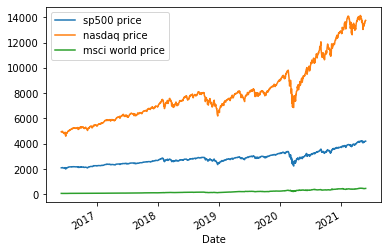

In [64]:

combined_stocks.plot()

<AxesSubplot:xlabel='Date'>

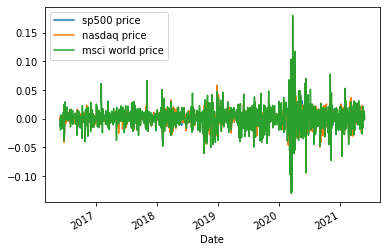

In [63]:
## % change display
combined_stocks.pct_change().plot()

<AxesSubplot:ylabel='Frequency'>

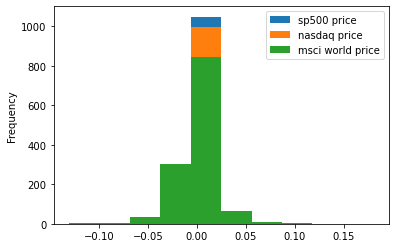

In [59]:
## Correlations of Stock Portfolio


combined_stocks.pct_change().plot(kind="hist")

In [60]:
combined_stocks_corr=combined_stocks.pct_change().corr()
combined_stocks_corr

,sp500 price,nasdaq price,msci world price
sp500 price,1.000000,0.945933,0.710184
nasdaq price,0.945933,1.000000,0.724921
msci world price,0.710184,0.724921,1.000000


In [ ]:
## Cumulative return Portfolio performance 

In [66]:
stock_daily_returns = combined_stocks.pct_change()

In [67]:
cumulative_returns = (1 + stock_daily_returns).cumprod()

<AxesSubplot:xlabel='Date'>

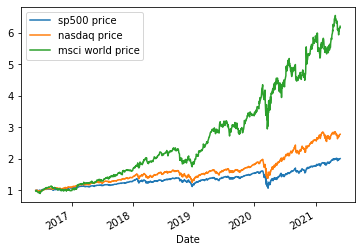

In [68]:
## Calculating cumulative returns
cumulative_returns.plot()

In [79]:
## Combined Crypto
combined_crypto = pd.concat([bitcoin['Close'], ethereum['Close'], cardano['Close'], bitcoin_cash['Close'], 
litecoin['Close'], aave['Close'], dash['Close']], axis = 1)
combined_crypto.columns = ['bitcoin price', 'ethereum price', 'cardano price', 'bitcoin cash price', 'litecoin price'
, 'aave price', 'dash price']

combined_crypto.head()

,bitcoin price,ethereum price,cardano price,bitcoin cash price,litecoin price,aave price,dash price
Date,,,,,,,
2016-05-29,526.232971,12.3504,NaN,NaN,4.60962,NaN,8.18925
2016-05-30,533.864014,12.7253,NaN,NaN,4.67087,NaN,8.20357
2016-05-31,531.385986,14.0773,NaN,NaN,4.65039,NaN,8.17684
2016-06-01,536.919983,14.0015,NaN,NaN,4.74099,NaN,8.25982
2016-06-02,537.971985,13.7380,NaN,NaN,4.71505,NaN,8.09979


<AxesSubplot:ylabel='Frequency'>

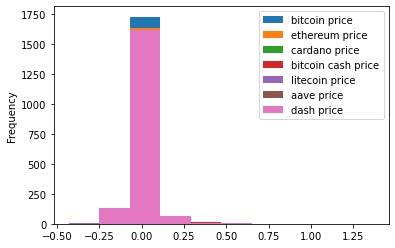

In [80]:
## Correlations of Crypto Portfolio


combined_crypto.pct_change().plot(kind="hist")

In [81]:
##cumulative returns

cumulative_returns = (1 + combined_crypto.pct_change()).cumprod()

<AxesSubplot:xlabel='Date'>

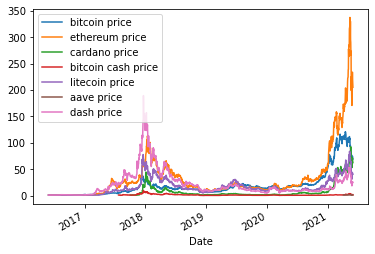

In [82]:
cumulative_returns.plot()

In [83]:
portfolio_df = pd.concat([combined_stocks, combined_crypto], axis = 1, join = 'inner')
portfolio_df.tail()


,sp500 price,nasdaq price,msci world price,bitcoin price,ethereum price,cardano price,bitcoin cash price,litecoin price,aave price,dash price
Date,,,,,,,,,,
2021-05-21,4155.859863,13470.990234,456.880005,37304.691406,2430.621338,1.552277,687.957153,180.197037,373.418518,188.729187
2021-05-24,4197.049805,13661.169922,462.850006,38705.980469,2643.591064,1.549485,748.421692,183.994125,385.571594,199.952576
2021-05-25,4188.129883,13657.169922,464.609985,38402.222656,2706.628906,1.555369,719.947815,183.497894,371.380249,195.235168
2021-05-26,4195.990234,13738.000000,465.100006,39294.199219,2888.698730,1.782702,765.048828,199.224335,414.932953,214.202271
2021-05-27,4200.879883,13736.280273,464.369995,38436.968750,2736.488525,1.645960,745.955078,193.121094,369.978119,203.325684


In [84]:
################  Portfolio Planner

In [85]:
daily_returns = portfolio_df.pct_change()
daily_returns.head()

,sp500 price,nasdaq price,msci world price,bitcoin price,ethereum price,cardano price,bitcoin cash price,litecoin price,aave price,dash price
Date,,,,,,,,,,
2016-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-01,0.001135,0.000849,-0.013536,0.010414,-0.005385,NaN,NaN,0.019482,NaN,0.010148
2016-06-02,0.002825,0.003859,-0.000762,0.001959,-0.018819,NaN,NaN,-0.005471,NaN,-0.019375
2016-06-03,-0.002912,-0.005801,-0.019581,0.058036,0.007912,NaN,NaN,0.030948,NaN,-0.004811
2016-06-06,0.004897,0.005299,0.003243,0.028713,0.006312,NaN,NaN,0.020200,NaN,-0.035624


In [112]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return

weights = [0.10,0.10,0.10,0.10,0.10, 0.10, 0.10,0.10,0.10,0.10]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

Date
2016-05-31   NaN
2016-06-01   NaN
2016-06-02   NaN
2016-06-03   NaN
2016-06-06   NaN
dtype: float64

In [113]:
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

Date
2016-05-31   NaN
2016-06-01   NaN
2016-06-02   NaN
2016-06-03   NaN
2016-06-06   NaN
dtype: float64

<AxesSubplot:xlabel='Date'>

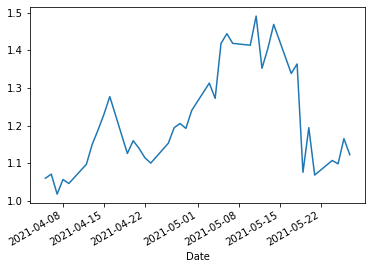

In [114]:
cumulative_returns.plot()

In [86]:
correlation = daily_returns.corr()
correlation

,sp500 price,nasdaq price,msci world price,bitcoin price,ethereum price,cardano price,bitcoin cash price,litecoin price,aave price,dash price
sp500 price,1.000000,0.946040,0.712748,0.166288,0.175449,0.152836,0.113981,0.150885,0.145275,0.131967
nasdaq price,0.946040,1.000000,0.726700,0.172050,0.176023,0.153135,0.113544,0.157077,0.234964,0.132423
msci world price,0.712748,0.726700,1.000000,0.100041,0.102966,0.089155,0.062220,0.094988,0.232412,0.087738
bitcoin price,0.166288,0.172050,0.100041,1.000000,0.595655,0.496202,0.548157,0.612531,0.623466,0.555262
ethereum price,0.175449,0.176023,0.102966,0.595655,1.000000,0.544345,0.620619,0.568273,0.781212,0.597995
cardano price,0.152836,0.153135,0.089155,0.496202,0.544345,1.000000,0.422480,0.507015,0.681361,0.465604
bitcoin cash price,0.113981,0.113544,0.062220,0.548157,0.620619,0.422480,1.000000,0.567820,0.533160,0.624139
litecoin price,0.150885,0.157077,0.094988,0.612531,0.568273,0.507015,0.567820,1.000000,0.687473,0.528018
aave price,0.145275,0.234964,0.232412,0.623466,0.781212,0.681361,0.533160,0.687473,1.000000,0.670544
dash price,0.131967,0.132423,0.087738,0.555262,0.597995,0.465604,0.624139,0.528018,0.670544,1.000000


<AxesSubplot:>

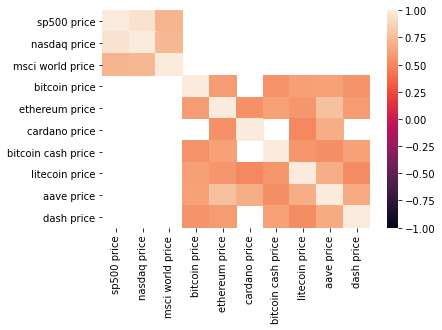

In [87]:
sns.heatmap(correlation[correlation>0.5], vmin=-1, vmax=1)

In [88]:
correlation.sum(axis=0).sort_values()

msci world price      3.208968
sp500 price           3.695468
nasdaq price          3.811957
cardano price         4.512133
bitcoin cash price    4.606120
dash price            4.793690
bitcoin price         4.869650
litecoin price        4.874079
ethereum price        5.162537
aave price            5.589867
dtype: float64

In [89]:
# Drop highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = daily_returns.drop(columns=['aave price', 'ethereum price'])
noncorrelated_daily_returns.head()

,sp500 price,nasdaq price,msci world price,bitcoin price,cardano price,bitcoin cash price,litecoin price,dash price
Date,,,,,,,,
2016-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-01,0.001135,0.000849,-0.013536,0.010414,NaN,NaN,0.019482,0.010148
2016-06-02,0.002825,0.003859,-0.000762,0.001959,NaN,NaN,-0.005471,-0.019375
2016-06-03,-0.002912,-0.005801,-0.019581,0.058036,NaN,NaN,0.030948,-0.004811
2016-06-06,0.004897,0.005299,0.003243,0.028713,NaN,NaN,0.020200,-0.035624


In [93]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (noncorrelated_daily_returns.mean()) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values()

bitcoin cash price    0.003144
sp500 price           0.003281
nasdaq price          0.004203
dash price            0.004448
litecoin price        0.004726
msci world price      0.005201
cardano price         0.005336
bitcoin price         0.005976
dtype: float64

In [94]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks in this case sp500 and btcash
candidate_daily_returns = noncorrelated_daily_returns.drop(columns=['bitcoin cash price', 'sp500 price'])
candidate_daily_returns.head()

,nasdaq price,msci world price,bitcoin price,cardano price,litecoin price,dash price
Date,,,,,,
2016-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-01,0.000849,-0.013536,0.010414,NaN,0.019482,0.010148
2016-06-02,0.003859,-0.000762,0.001959,NaN,-0.005471,-0.019375
2016-06-03,-0.005801,-0.019581,0.058036,NaN,0.030948,-0.004811
2016-06-06,0.005299,0.003243,0.028713,NaN,0.020200,-0.035624


<AxesSubplot:xlabel='Date'>

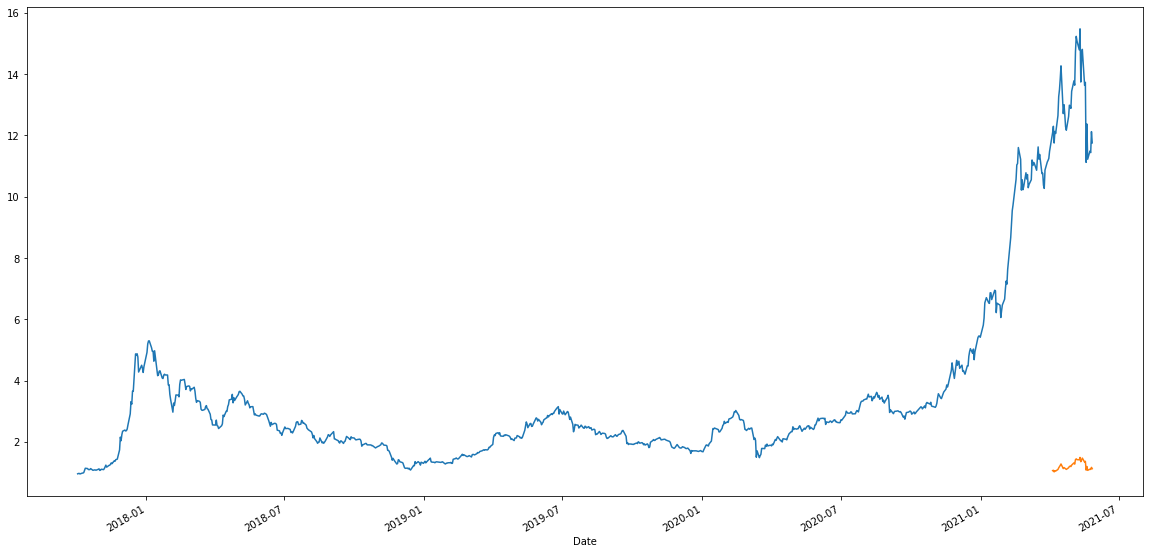

In [118]:
initial_investment = 10000
weights = [.1666, .1666, .1666, .1666, .1666,.1666 ]
candidate_portfolio_returns = candidate_daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_returns.plot(figsize=(20,10))
cumulative_returns.plot()

In [122]:
### Monte carlo simulation on combined portfolio
mc_fiveyear = MCSimulation(candidate_daily_returns, [.1666, .1666, .1666, .1666, .1666,.1666], 500, 252*5)

IndexError: Too many levels: Index has only 1 level, not 2